In [29]:
# Importar os pacotes

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [34]:
dados = pd.read_csv('dados_carros.csv')

In [35]:
dados.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [36]:
display(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


None

In [37]:
# remover colunas que nao serao utilizadas
dados.drop(columns=['User ID'], inplace=True)

In [38]:
# estatisticas descritivas

#variaveis metricas
display(dados[['Age','AnnualSalary']].describe())


# Variáveis categóricas
display(dados['Gender'].value_counts())
display(dados['Purchased'].value_counts())

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,40.106000,72689.000000
std,10.707073,34488.341867
min,18.000000,15000.000000
25%,32.000000,46375.000000
50%,40.000000,72000.000000
75%,48.000000,90000.000000
max,63.000000,152500.000000


Gender
Female    516
Male      484
Name: count, dtype: int64

Purchased
0    598
1    402
Name: count, dtype: int64

In [39]:
# Transformando variáveis explicativas categóricas em dummies
dados = pd.get_dummies(dados, columns=['Gender'], drop_first=True, dtype=int)

In [28]:
display(dados.head())

,Age,AnnualSalary,Purchased,Gender_Male
0,35,20000,0,1
1,40,43500,0,1
2,49,74000,0,1
3,40,107500,1,1
4,25,79000,0,1


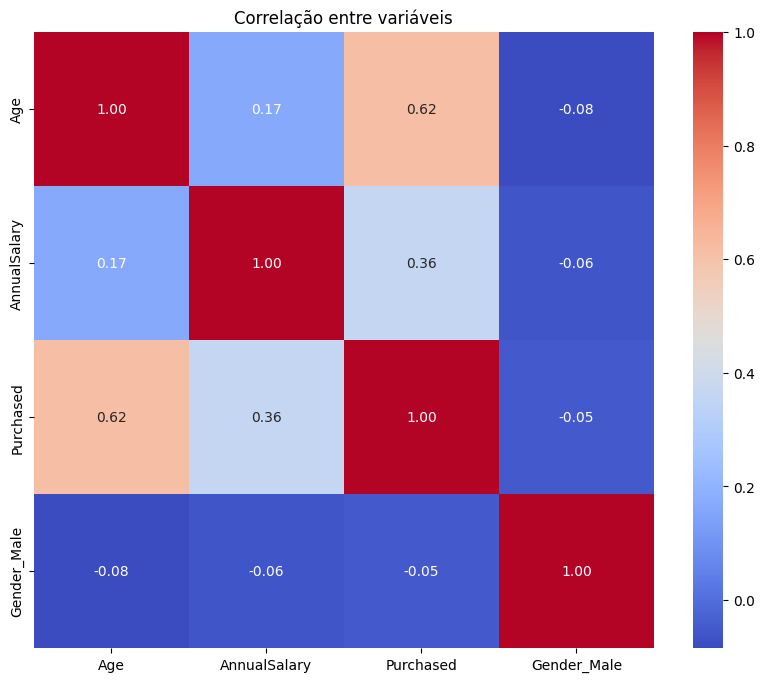

In [40]:
corr = dados.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre variáveis')
plt.show()

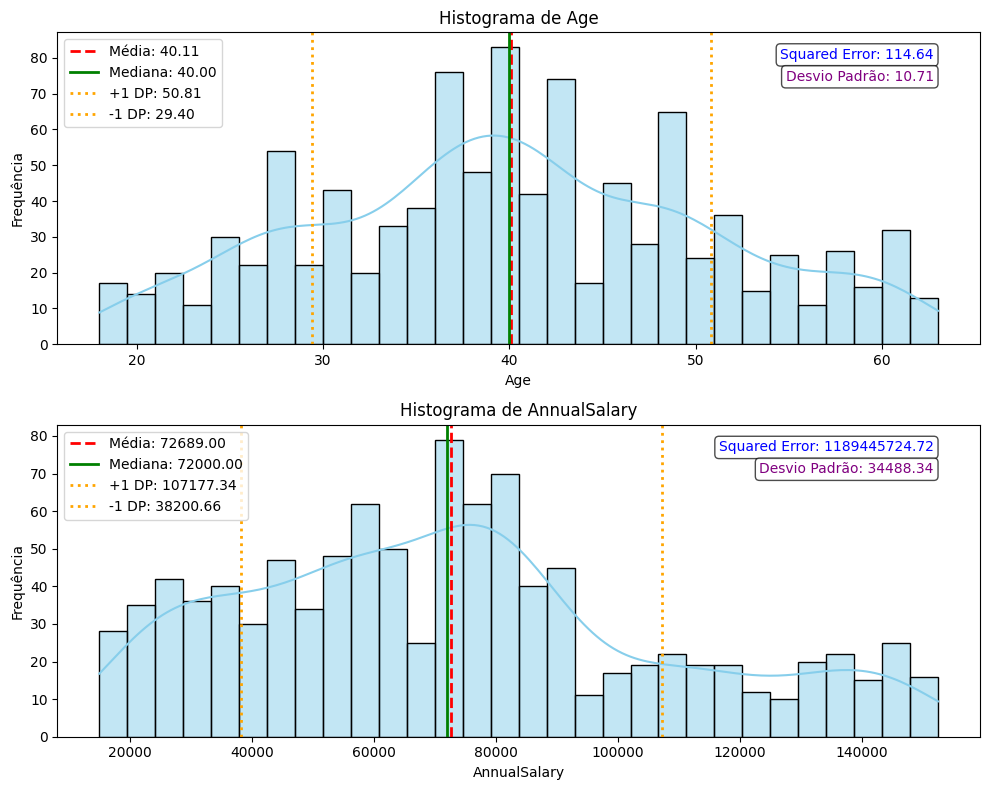

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sets = ['Age', 'AnnualSalary']

# Cria a grade de subplots (2 linhas, 1 coluna)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  
axes = axes.flatten()  # transforma matriz de eixos em lista

for i, col in enumerate(sets):
    media = dados[col].mean()
    mediana = dados[col].median()
    desvio = dados[col].std()
    squared_error = desvio**2  # variância

    # Histograma
    sns.histplot(dados[col], bins=30, kde=True, color='skyblue', ax=axes[i])

    # Média
    axes[i].axvline(media, color='red', linestyle='--', linewidth=2, 
                    label=f'Média: {media:.2f}')
    # Mediana
    axes[i].axvline(mediana, color='green', linestyle='-', linewidth=2, 
                    label=f'Mediana: {mediana:.2f}')
    # Desvio padrão
    axes[i].axvline(media + desvio, color='orange', linestyle=':', linewidth=2, 
                    label=f'+1 DP: {media+desvio:.2f}')
    axes[i].axvline(media - desvio, color='orange', linestyle=':', linewidth=2, 
                    label=f'-1 DP: {media-desvio:.2f}')
    
    # Inclui Squared Error (variância)
    axes[i].text(0.95, 0.95, f'Squared Error: {squared_error:.2f}',
                 transform=axes[i].transAxes, fontsize=10, 
                 color='blue', ha='right', va='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    # Inclui Desvio Padrão logo abaixo
    axes[i].text(0.95, 0.88, f'Desvio Padrão: {desvio:.2f}',
                 transform=axes[i].transAxes, fontsize=10, 
                 color='purple', ha='right', va='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

    # Legenda dentro, mas no canto superior esquerdo
    axes[i].legend(loc='upper left')

# Ajusta layout
plt.tight_layout()
plt.show()


C:\Users\Paulo\AppData\Local\Temp\ipykernel_19696\1644870115.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


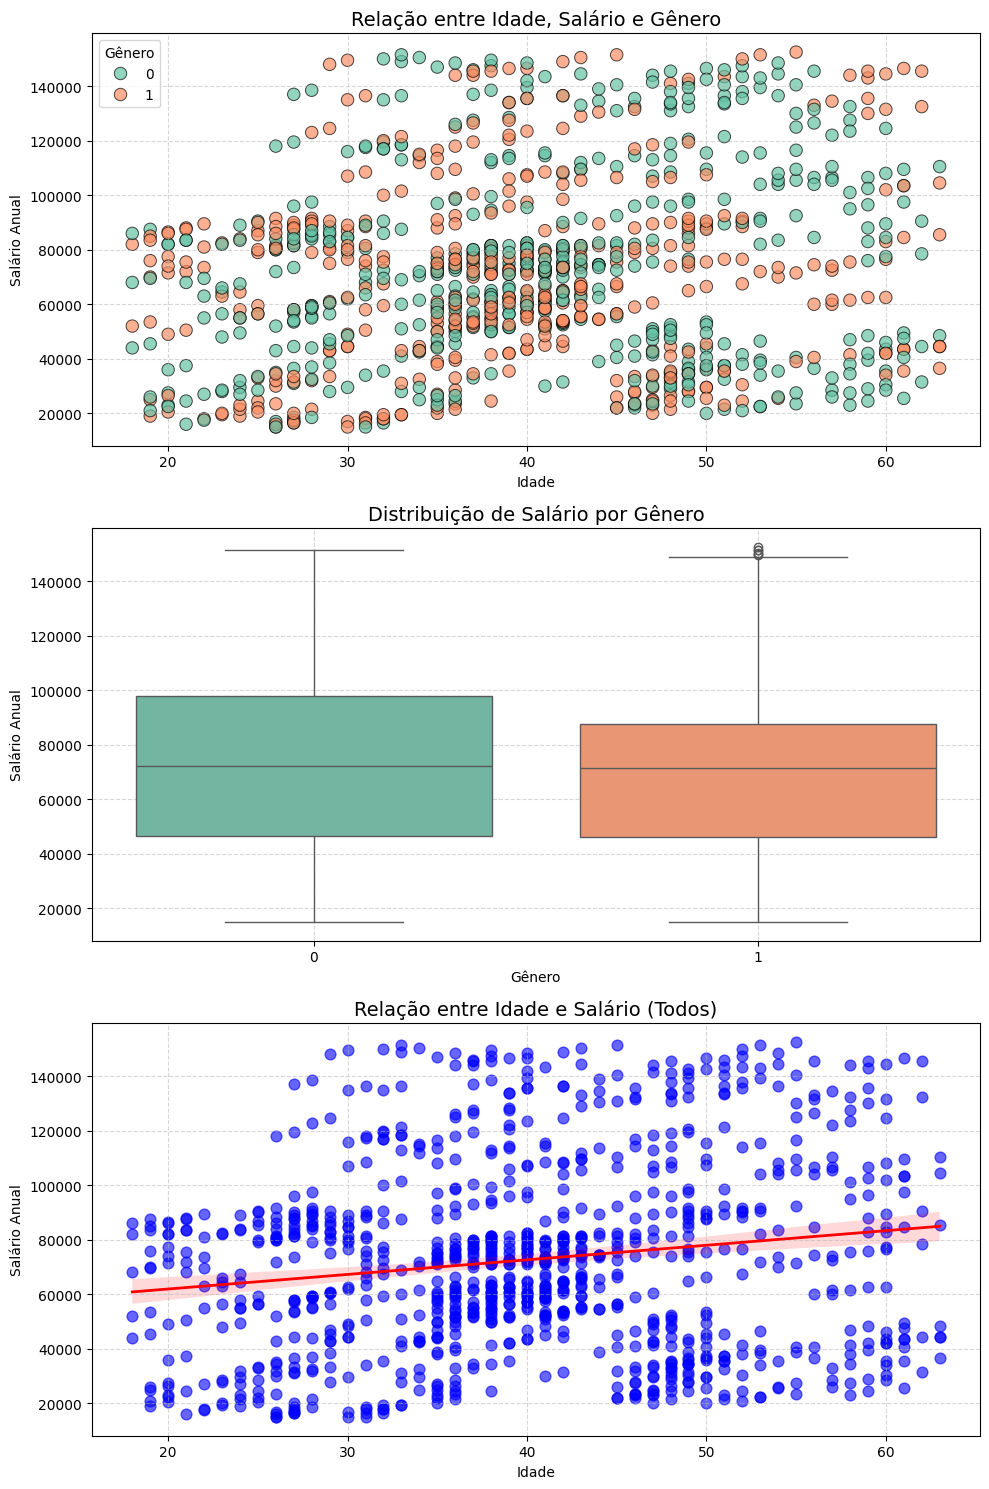

In [60]:

# Criar subplots (3 linhas, 1 coluna)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# --- 1️⃣ Gráfico de Dispersão (por gênero) ---
sns.scatterplot(
    data=dados,
    x='Age',
    y='AnnualSalary',
    hue='Gender_Male',
    palette='Set2',
    s=80,
    alpha=0.7,
    edgecolor='black',
    ax=axes[0]
)
axes[0].set_title('Relação entre Idade, Salário e Gênero', fontsize=14)
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Salário Anual')
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend(title='Gênero')

# --- 2️⃣ Boxplot (salário por gênero) ---
sns.boxplot(
    data=dados,
    x='Gender_Male',
    y='AnnualSalary',
    palette='Set2',
    ax=axes[1]
)
axes[1].set_title('Distribuição de Salário por Gênero', fontsize=14)
axes[1].set_xlabel('Gênero')
axes[1].set_ylabel('Salário Anual')
axes[1].grid(True, linestyle='--', alpha=0.5)

# --- 3️⃣ Gráfico Age × AnnualSalary (sem gênero, com linha de tendência) ---
sns.regplot(
    data=dados,
    x='Age',
    y='AnnualSalary',
    scatter_kws={'s': 60, 'alpha': 0.6, 'color': 'blue'},
    line_kws={'color': 'red', 'linewidth': 2},
    ax=axes[2]
)
axes[2].set_title('Relação entre Idade e Salário (Todos)', fontsize=14)
axes[2].set_xlabel('Idade')
axes[2].set_ylabel('Salário Anual')
axes[2].grid(True, linestyle='--', alpha=0.5)

# Ajustar layout
plt.tight_layout()
plt.show()


In [64]:
# separando as variaveis y e X
X = dados.drop(columns=['Purchased'])
y = dados['Purchased']

In [65]:

# Vamos escolher 70% das observações para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100)

In [66]:
# Estimando uma random forest
rf_clf = RandomForestClassifier(n_estimators=50,
                                max_depth=2,
                                max_features=3,
                                random_state=100)
rf_clf.fit(X_train, y_train)

# n_estimators: qtde de árvores estimadas
# max_depth: profundidade máxima das árvores
# max_features: qtde de variáveis preditoras consideradas nos splits
# min_samples_split: qtde mínima de observações exigidas para dividir o nó
# min_samples_leaf: qtde mínima de observações exigidas para ser nó folha

RandomForestClassifier(max_depth=2, max_features=3, n_estimators=50,
                       random_state=100)

## Obtendo os valores preditos pela RF

1. Predict na base de treinamento

rf_pred_train_class = rf_clf.predict(X_train)
Aqui o modelo olha para os dados que ele já viu (X_train) e dá a previsão final para cada registro.

Exemplo:

Entrada: dados de uma pessoa (idade, salário, etc.)

Saída: 1 (vai comprar) ou 0 (não vai comprar)

Isso é útil para ver se ele “decorou” os dados de treino.

rf_pred_train_prob = rf_clf.predict_proba(X_train)
Aqui ele não dá só o 0 ou 1, mas a probabilidade de cada classe.

Exemplo:

[0.25, 0.75] → 25% de chance de não comprar, 75% de chance de comprar

Isso é bom quando você quer trabalhar com limiares diferentes (ex.: considerar compra se passar de 70%).

2. Predict na base de testes

rf_pred_test_class = rf_clf.predict(X_test)
Agora ele olha para os dados novos que nunca viu antes (X_test) e tenta prever a classe final.

Isso é o que realmente importa para medir se o modelo generaliza bem.

rf_pred_test_prob = rf_clf.predict_proba(X_test)
Igual ao anterior, mas retorna as probabilidades de cada classe para os dados de teste.

Exemplo:

[0.60, 0.40] → 60% de chance de não comprar, 40% de comprar.

💡 Resumo fácil:

predict() → Dá apenas a resposta final (0 ou 1).

predict_proba() → Dá a certeza que o modelo tem de cada resposta (em porcentagem).

📌 Resumo:

X_train → Ensinar o modelo (aprender o padrão)
X_test → Conferir se ele aprendeu (avaliar em dados novos)


In [67]:
# Predict na base de treinamento
rf_pred_train_class = rf_clf.predict(X_train) # Qual é a resposta final (classe) para cada exemplo
rf_pred_train_prob = rf_clf.predict_proba(X_train) # Qual é a probabilidade de cada resposta ser verdadeira

# Predict na base de testes
rf_pred_test_class = rf_clf.predict(X_test)
rf_pred_test_prob = rf_clf.predict_proba(X_test)

### Criando a matriz de confusão

python
Copiar
Editar
rf_cm_train = confusion_matrix(rf_pred_train_class, y_train)
Aqui ele compara o que o modelo previu (rf_pred_train_class) com o que era o valor real (y_train).

O resultado é uma tabela que mostra:

Quantos acertos de não (negativos).

Quantos acertos de sim (positivos).

Quantos erros em cada tipo.


#### Calculando métricas importantes

Acurácia → percentual total de acertos.

Sensibilidade (Recall para positivos) → entre os que eram “Sim” (1), quantos o modelo acertou.
Especificidade (Recall para negativos) → entre os que eram “Não” (0), quantos o modelo acertou.
Precisão → entre os que o modelo disse “Sim”, quantos realmente eram “Sim”.

Esses números significam:

380 → Verdadeiros Negativos (VN): modelo previu 0 e era 0
25 → Falsos Negativos (FN): modelo previu 0 mas era 1
39 → Falsos Positivos (FP): modelo previu 1 mas era 0
256 → Verdadeiros Positivos (VP): modelo previu 1 e era 1


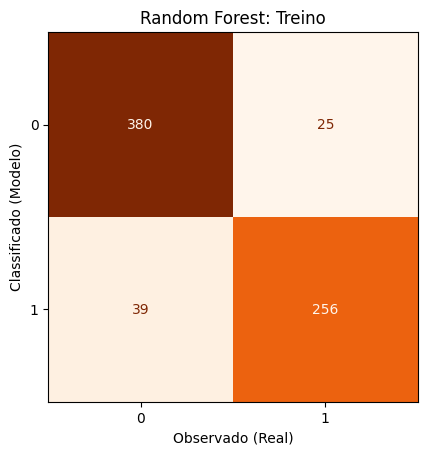

Avaliação da RF (Base de Treino)
Acurácia: 90.9%
Sensibilidade: 91.1%
Especificidade: 90.7%
Precision: 86.8%


In [77]:
# Matriz de confusão (base de treino)

rf_cm_train = confusion_matrix(rf_pred_train_class, y_train)
cm_rf_train = ConfusionMatrixDisplay(rf_cm_train)

plt.rcParams['figure.dpi'] = 100
cm_rf_train.plot(colorbar=False, cmap='Oranges')
plt.title('Random Forest: Treino')
plt.xlabel('Observado (Real)')
plt.ylabel('Classificado (Modelo)')
plt.show()

acc_rf_train = accuracy_score(y_train, rf_pred_train_class)
sens_rf_train = recall_score(y_train, rf_pred_train_class, pos_label=1)
espec_rf_train = recall_score(y_train, rf_pred_train_class, pos_label=0)
prec_rf_train = precision_score(y_train, rf_pred_train_class)

print("Avaliação da RF (Base de Treino)")
print(f"Acurácia: {acc_rf_train:.1%}")
print(f"Sensibilidade: {sens_rf_train:.1%}")
print(f"Especificidade: {espec_rf_train:.1%}")
print(f"Precision: {prec_rf_train:.1%}")

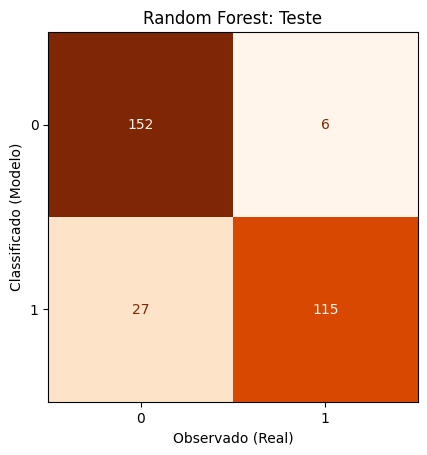

Avaliação da RF (Base de Teste)
Acurácia: 89.0%
Sensibilidade: 95.0%
Especificidade: 84.9%
Precision: 81.0%


In [79]:
# Matriz de confusão (base de teste)

rf_cm_test = confusion_matrix(rf_pred_test_class, y_test)
cm_rf_test = ConfusionMatrixDisplay(rf_cm_test)

plt.rcParams['figure.dpi'] = 100
cm_rf_test.plot(colorbar=False, cmap='Oranges')
plt.title('Random Forest: Teste')
plt.xlabel('Observado (Real)')
plt.ylabel('Classificado (Modelo)')
plt.show()

acc_rf_test = accuracy_score(y_test, rf_pred_test_class)
sens_rf_test = recall_score(y_test, rf_pred_test_class, pos_label=1)
espec_rf_test = recall_score(y_test, rf_pred_test_class, pos_label=0)
prec_rf_test = precision_score(y_test, rf_pred_test_class)

print("Avaliação da RF (Base de Teste)")
print(f"Acurácia: {acc_rf_test:.1%}")
print(f"Sensibilidade: {sens_rf_test:.1%}")
print(f"Especificidade: {espec_rf_test:.1%}")
print(f"Precision: {prec_rf_test:.1%}")

# Grid Search (refinar o modelo)

GridSearchCV → vai treinar o modelo para todas as combinações de hiperparâmetros possíveis.
cv=5 → usa validação cruzada 5-fold (divide treino em 5 partes, treina em 4 e valida em 1, repetindo).
scoring='accuracy' → métrica usada para escolher o melhor modelo.
verbose=2 → mostra o andamento no console.


In [80]:
# Vamos especificar a lista de hiperparâmetros desejados e seus valores
param_grid_rf = {
    'n_estimators': [500, 1000],
    'max_depth': [5, 7],
    'max_features': [2, 3],
    'min_samples_split': [20, 50]
}

# Identificar o algoritmo em uso
rf_grid = RandomForestClassifier(random_state=100)

# Treinar os modelos para o grid search
rf_grid_model = GridSearchCV(estimator = rf_grid, 
                             param_grid = param_grid_rf,
                             scoring='accuracy',
                             cv=5, verbose=2)

rf_grid_model.fit(X_train, y_train)

# Verificando os melhores parâmetros obtidos
rf_grid_model.best_params_

# Gerando o modelo com os melhores hiperparâmetros
rf_best = rf_grid_model.best_estimator_

# Predict na base de treino
rf_grid_pred_train_class = rf_best.predict(X_train)
rf_grid_pred_train_prob = rf_best.predict_proba(X_train)

# Predict na base de testes
rf_grid_pred_test_class = rf_best.predict(X_test)
rf_grid_pred_test_prob = rf_best.predict_proba(X_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=5, max_features=2, min_samples_split=20, n_estimators=500; total time=   0.7s
[CV] END max_depth=5, max_features=2, min_samples_split=20, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=2, min_samples_split=20, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=2, min_samples_split=20, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=20, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=20, n_estimators=1000; total time=   1.2s
[CV] END max_depth=5, max_features=2, min_samples_split=20, n_estimators=1000; total time=   1.4s
[CV] END max_depth=5, max_features=2, min_samples_split=20, n_estimators=1000; total time=   1.2s
[CV] END max_depth=5, max_features=2, min_samples_split=20, n_estimators=1000; total time=   1.2s
[CV] END max_depth=5, max_features=2, min_samples_split=20, n_

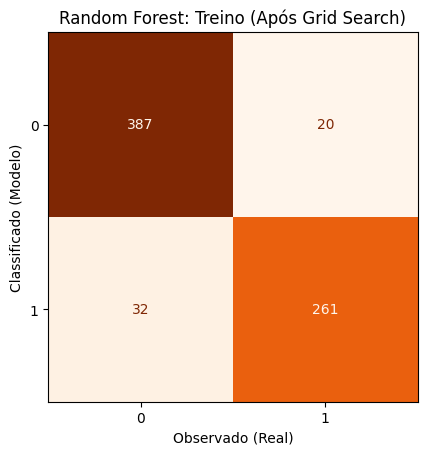

Avaliação da RF Após Grid Search (Base de Treino)
Acurácia: 92.6%
Sensibilidade: 92.9%
Especificidade: 92.4%
Precision: 89.1%


In [83]:
# Matriz de confusão (base de treino)

rf_grid_cm_train = confusion_matrix(rf_grid_pred_train_class, y_train)
cm_rf_grid_train = ConfusionMatrixDisplay(rf_grid_cm_train)

plt.rcParams['figure.dpi'] = 100
cm_rf_grid_train.plot(colorbar=False, cmap='Oranges')
plt.title('Random Forest: Treino (Após Grid Search)')
plt.xlabel('Observado (Real)')
plt.ylabel('Classificado (Modelo)')
plt.show()

acc_rf_grid_train = accuracy_score(y_train, rf_grid_pred_train_class)
sens_rf_grid_train = recall_score(y_train, rf_grid_pred_train_class, pos_label=1)
espec_rf_grid_train = recall_score(y_train, rf_grid_pred_train_class, pos_label=0)
prec_rf_grid_train = precision_score(y_train, rf_grid_pred_train_class)

print("Avaliação da RF Após Grid Search (Base de Treino)")
print(f"Acurácia: {acc_rf_grid_train:.1%}")
print(f"Sensibilidade: {sens_rf_grid_train:.1%}")
print(f"Especificidade: {espec_rf_grid_train:.1%}")
print(f"Precision: {prec_rf_grid_train:.1%}")


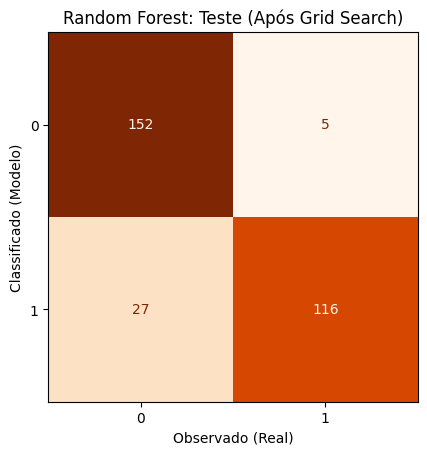

Avaliação da RF Após Grid Search (Base de Teste)
Acurácia: 89.3%
Sensibilidade: 95.9%
Especificidade: 84.9%
Precision: 81.1%


In [81]:
# Matriz de confusão (base de teste)

rf_grid_cm_test = confusion_matrix(rf_grid_pred_test_class, y_test)
cm_rf_grid_test = ConfusionMatrixDisplay(rf_grid_cm_test)

plt.rcParams['figure.dpi'] = 100
cm_rf_grid_test.plot(colorbar=False, cmap='Oranges')
plt.title('Random Forest: Teste (Após Grid Search)')
plt.xlabel('Observado (Real)')
plt.ylabel('Classificado (Modelo)')
plt.show()

acc_rf_grid_test = accuracy_score(y_test, rf_grid_pred_test_class)
sens_rf_grid_test = recall_score(y_test, rf_grid_pred_test_class, pos_label=1)
espec_rf_grid_test = recall_score(y_test, rf_grid_pred_test_class, pos_label=0)
prec_rf_grid_test = precision_score(y_test, rf_grid_pred_test_class)

print("Avaliação da RF Após Grid Search (Base de Teste)")
print(f"Acurácia: {acc_rf_grid_test:.1%}")
print(f"Sensibilidade: {sens_rf_grid_test:.1%}")
print(f"Especificidade: {espec_rf_grid_test:.1%}")
print(f"Precision: {prec_rf_grid_test:.1%}")

In [85]:
# Importância das variáveis preditoras

rf_features = pd.DataFrame({'features':X.columns.tolist(),
                            'importance':rf_best.feature_importances_})

display(rf_features)

,features,importance
0,Age,0.550833
1,AnnualSalary,0.446053
2,Gender_Male,0.003114


# Curva ROC (base de teste)
A linha da curva é o desempenho do modelo: quanto mais ela se aproxima do canto superior esquerdo, melhor a separação entre classes.

A linha diagonal (de 45°) é o “chute aleatório” — quanto mais sua curva estiver longe dela, melhor.

No seu caso, um AUC de 0,966 significa que a curva está bem próxima do canto superior esquerdo, o que confirma um ótimo desempenho.

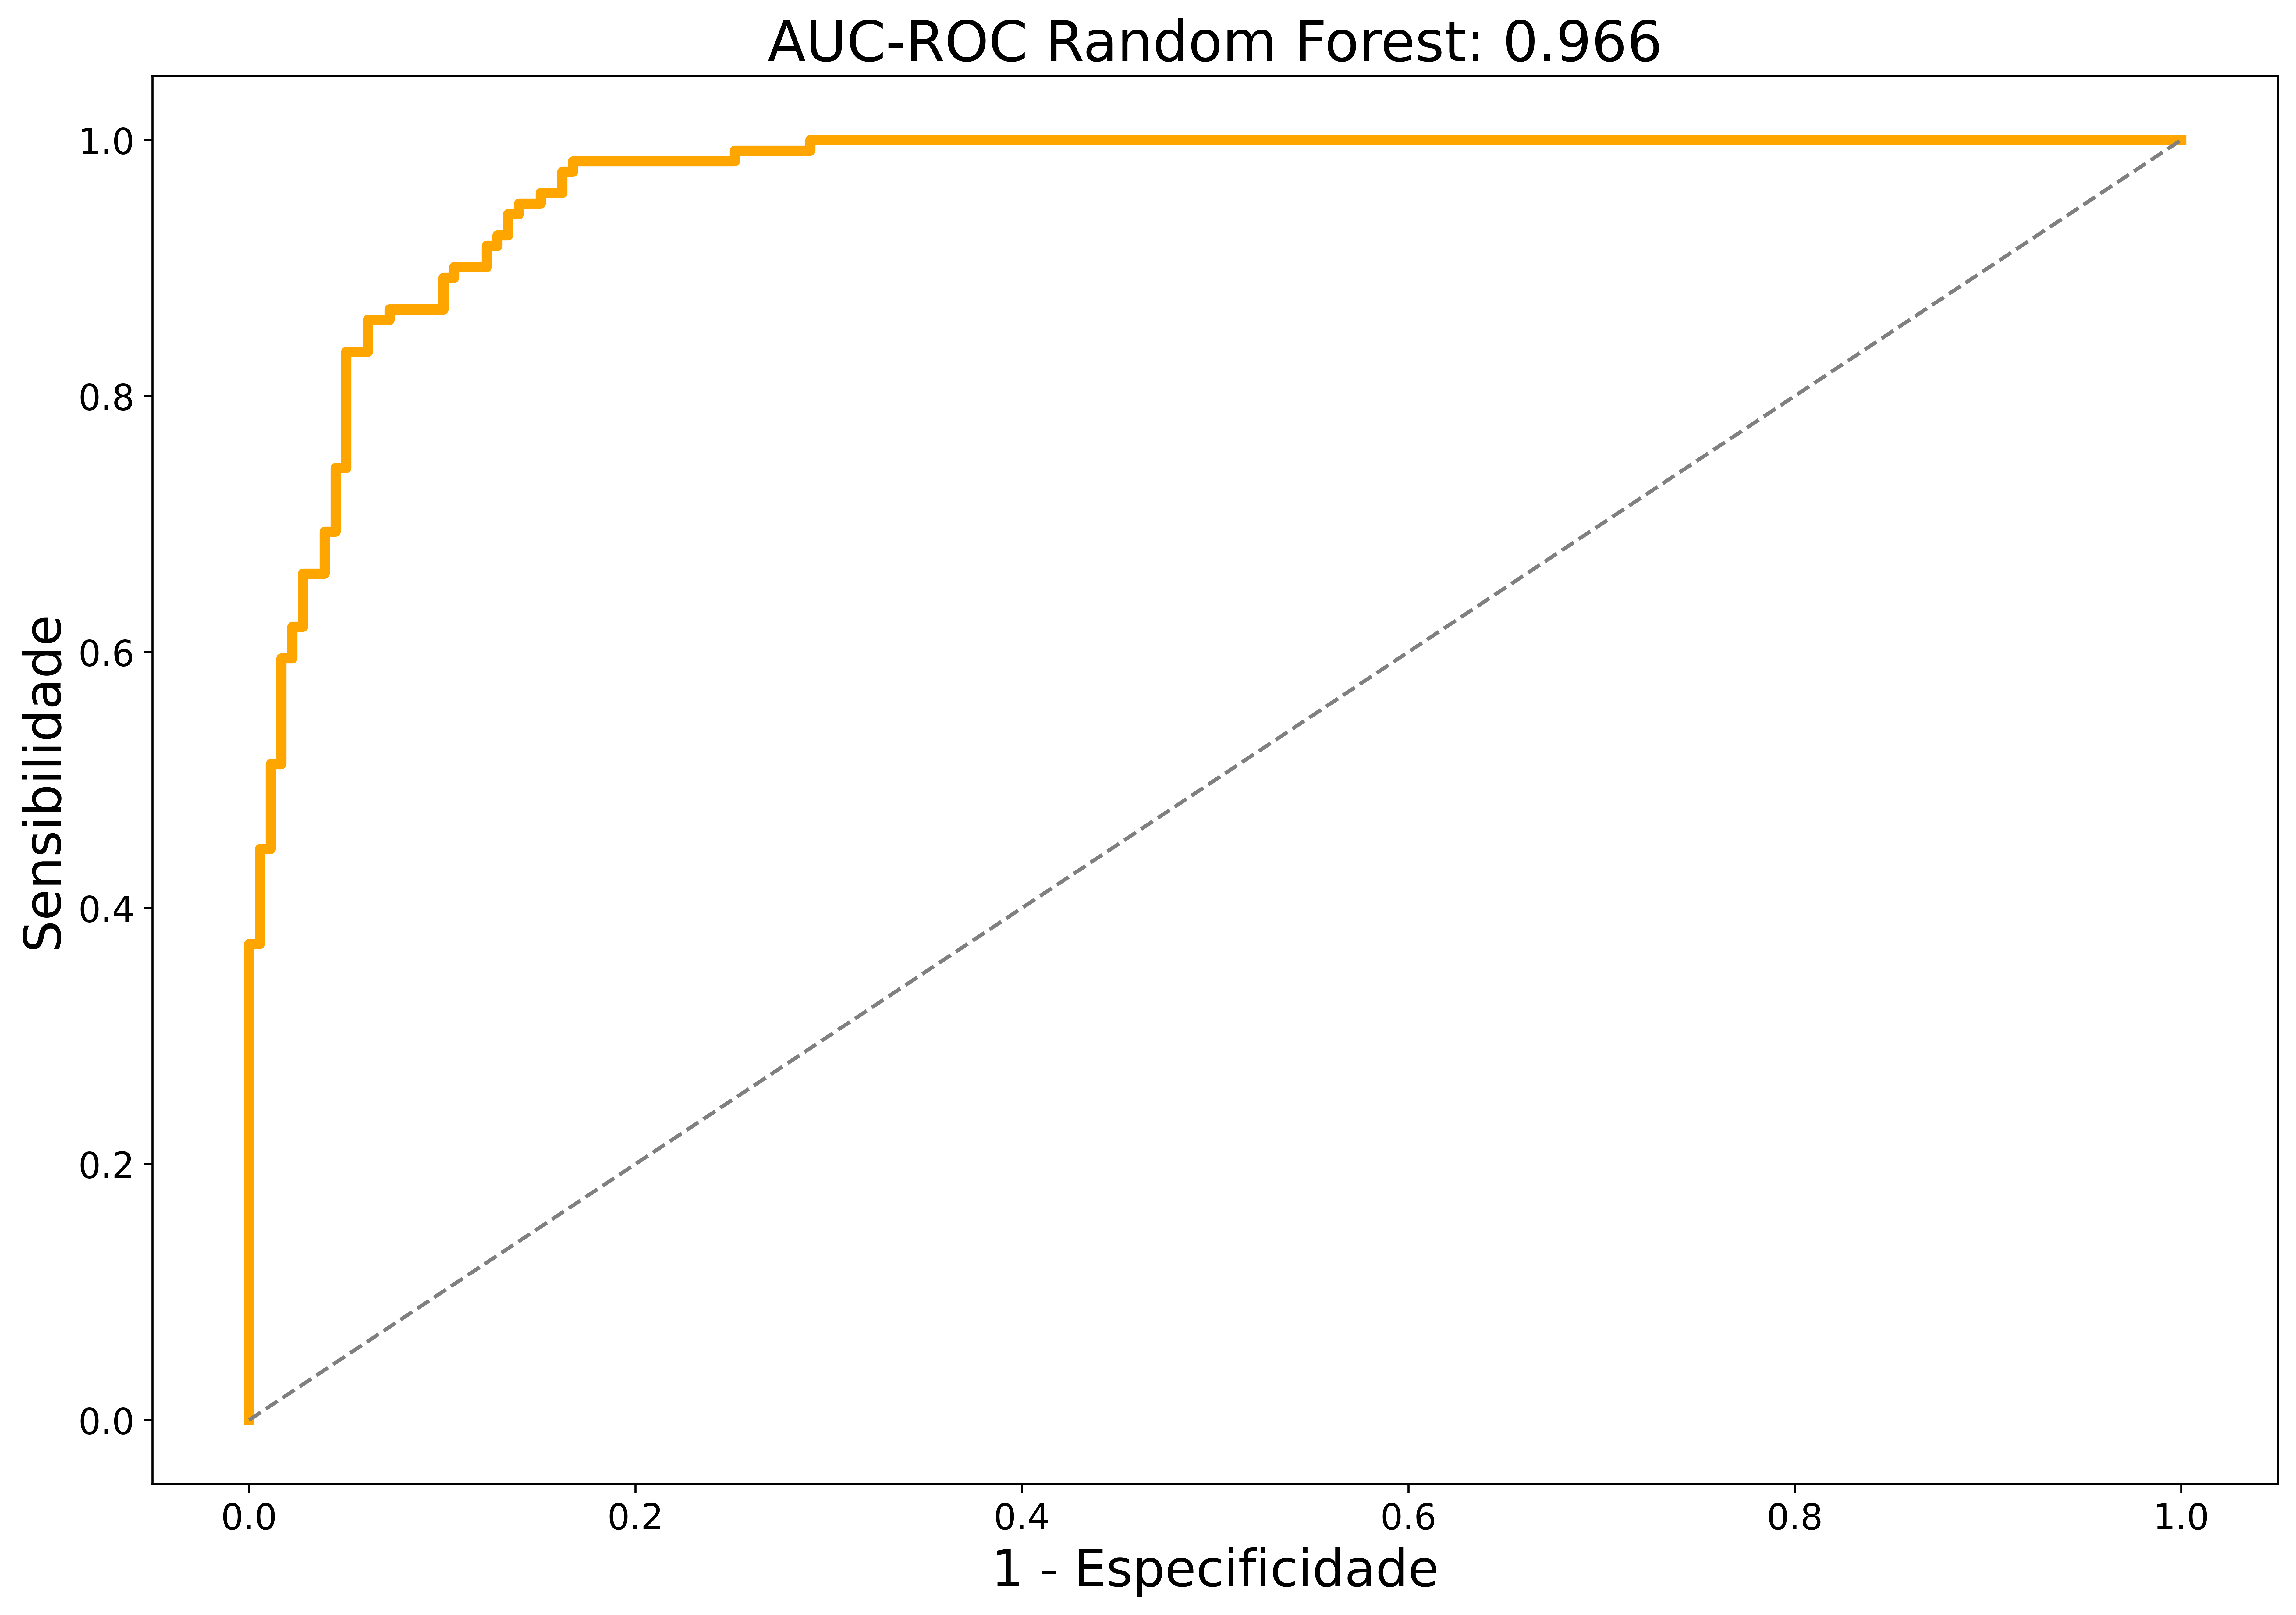

In [86]:
#%% Curva ROC (base de teste)

# Parametrizando a função da curva ROC (real vs. previsto)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_grid_pred_test_prob[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotando a curva ROC
plt.figure(figsize=(15,10), dpi=600)
plt.plot(fpr_rf, tpr_rf, color='Orange', linewidth=4)
plt.plot(fpr_rf, fpr_rf, color='gray', linestyle='dashed')
plt.title('AUC-ROC Random Forest: %g' % round(roc_auc_rf, 3), fontsize=22)
plt.xlabel('1 - Especificidade', fontsize=20)
plt.ylabel('Sensibilidade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show()

# Testando com novos dados


In [100]:
novo_cliente = pd.DataFrame({
    'Age': [22, 35, 28, 45, 50, 31, 40, 26, 55, 38],
    'AnnualSalary': [30000, 55000, 42000, 80000, 95000, 60000, 70000, 38000, 120000, 65000],
    'Gender_Male': [1, 0, 1, 1, 0, 0, 1, 1, 0, 0]
})

modelo_rf = rf_best.predict_proba(novo_cliente)[:, 1]  # Probabilidade de compra

resultado = novo_cliente.copy()
resultado["Probabilidade_Compra"] = (modelo_rf * 100).round(2)

# Ordenar antes de converter para texto
resultado = resultado.sort_values(by="Probabilidade_Compra", ascending=False)

# Converter para string com '%'
resultado["Probabilidade_Compra"] = resultado["Probabilidade_Compra"].astype(str) + '%'

display(resultado)


,Age,AnnualSalary,Gender_Male,Probabilidade_Compra
8,55,120000,0,86.46%
4,50,95000,0,86.03%
3,45,80000,1,48.69%
6,40,70000,1,16.88%
9,38,65000,0,1.55%
5,31,60000,0,0.5%
2,28,42000,1,0.47%
1,35,55000,0,0.31%
0,22,30000,1,0.18%
7,26,38000,1,0.04%


In [103]:
# Usando o predict para obter a classe prevista (0 ou 1)
modelo_rf = rf_best.predict(novo_cliente)

resultado = novo_cliente.copy()
resultado["Compra_Prevista"] = modelo_rf  # Adiciona a coluna com 0 ou 1

# Ordenar do que o modelo considera como "compra" (1) para "não compra" (0)
resultado = resultado.sort_values(by="Compra_Prevista", ascending=False)

display(resultado)


,Age,AnnualSalary,Gender_Male,Compra_Prevista
8,55,120000,0,1
4,50,95000,0,1
1,35,55000,0,0
0,22,30000,1,0
3,45,80000,1,0
2,28,42000,1,0
5,31,60000,0,0
6,40,70000,1,0
7,26,38000,1,0
9,38,65000,0,0
